# Income Dataset Analysis

This notebook prepares and analyzes the `income.csv` dataset to establish a clean data pipeline and a reliable baseline model before embarking on hyperparameter optimization. We will cover:

[1 Data loading & raw inspection](#1-data-loading-raw-inspection)   
[2 Data analysis & cleaning](#21-Data-analysis-&-cleaning)
- [2.1 Removing of the bytes prefix](#21-remove-the-bytes-prefix-to-facilitate-statistics)
- [2.2 Handling of the question marks, NaNs and duplicate rows](#22-we-treat-the-question-marks-as-missing-then-remove-the-question-marks-nans-and-duplicate-rows)  
- [2.3 Exploratory Data Analysis (EDA)](#23-exploratory-data-analysis-eda)  
  - [2.3.1 Comparison of numerical feature distribution](#231-comparison-of-numerical-feature-distribution)  
  - [2.3.2 Correlation between numerical features](#232-correlation-between-numerical-features)  
- [2.4 Feature Importance](#24-feature-importance) 
 
[3 Key Takeaways and Future Directions:](#3-key-takeaways-and-future-directions)  
  - [3.1 Core Drivers](#31-core-drivers)  
  - [3.2 Data Processing Guidelines](#32-data-processing-guidelines)  
  - [3.3 Practical Insights](#33-practical-insights)  


## **1 Data loading & raw inspection**

We first read the data, confirm its dimensions and types, and get an overview of both numerical and categorical distributions.

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

df = pd.read_csv(os.path.join('..', 'data', 'real', 'income.csv'))
print(df.shape)          
df.head()

(48842, 15)


,weekly-hours,sex,civil-status,birth-country,family-role,years-education,weight-factor,job-type,schooling,investment-loss,employment-type,ethnicity,age,investment-profit,class
0,40.0,b'Male',b'Never-married',b'United-States',b'Own-child',7.0,226802.0,b'Machine-op-inspct',b'11th',0.0,b'Private',b'Black',25.0,0.0,b'<=50K'
1,50.0,b'Male',b'Married-civ-spouse',b'United-States',b'Husband',9.0,89814.0,b'Farming-fishing',b'HS-grad',0.0,b'Private',b'White',38.0,0.0,b'<=50K'
2,40.0,b'Male',b'Married-civ-spouse',b'United-States',b'Husband',12.0,336951.0,b'Protective-serv',b'Assoc-acdm',0.0,b'Local-gov',b'White',28.0,0.0,b'>50K'
3,40.0,b'Male',b'Married-civ-spouse',b'United-States',b'Husband',10.0,160323.0,b'Machine-op-inspct',b'Some-college',0.0,b'Private',b'Black',44.0,7688.0,b'>50K'
4,30.0,b'Female',b'Never-married',b'United-States',b'Own-child',10.0,103497.0,b'?',b'Some-college',0.0,b'?',b'White',18.0,0.0,b'<=50K'


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   weekly-hours       48842 non-null  float64
 1   sex                48842 non-null  object 
 2   civil-status       48842 non-null  object 
 3   birth-country      48842 non-null  object 
 4   family-role        48842 non-null  object 
 5   years-education    48842 non-null  float64
 6   weight-factor      48842 non-null  float64
 7   job-type           48842 non-null  object 
 8   schooling          48842 non-null  object 
 9   investment-loss    48842 non-null  float64
 10  employment-type    48842 non-null  object 
 11  ethnicity          48842 non-null  object 
 12  age                48842 non-null  float64
 13  investment-profit  48842 non-null  float64
 14  class              48842 non-null  object 
dtypes: float64(6), object(9)
memory usage: 5.6+ MB


In [36]:
df.describe(include="all").T  

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
weekly-hours,48842.0,NaN,NaN,NaN,40.422382,12.391444,1.0,40.0,40.0,45.0,99.0
sex,48842,2,b'Male',32650,NaN,NaN,NaN,NaN,NaN,NaN,NaN
civil-status,48842,7,b'Married-civ-spouse',22379,NaN,NaN,NaN,NaN,NaN,NaN,NaN
birth-country,48842,42,b'United-States',43832,NaN,NaN,NaN,NaN,NaN,NaN,NaN
family-role,48842,6,b'Husband',19716,NaN,NaN,NaN,NaN,NaN,NaN,NaN
years-education,48842.0,NaN,NaN,NaN,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
weight-factor,48842.0,NaN,NaN,NaN,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
job-type,48842,15,b'Prof-specialty',6172,NaN,NaN,NaN,NaN,NaN,NaN,NaN
schooling,48842,16,b'HS-grad',15784,NaN,NaN,NaN,NaN,NaN,NaN,NaN
investment-loss,48842.0,NaN,NaN,NaN,87.502314,403.004552,0.0,0.0,0.0,0.0,4356.0


## **2 Data analysis & cleaning**

During our initial inspection of the dataset, we noticed that all string values are prefixed with a “b”. To facilitate subsequent processing, we first need to remove this prefix.

#### **2.1 Remove the bytes prefix to facilitate statistics**

In [37]:
obj_cols = df.select_dtypes("object").columns
print(f"Element before conversion: {df[obj_cols[1]][3]}")
for c in obj_cols:
    df[c] = df[c].str.replace(r"^b'|'$", "", regex=True)
print(f"Element after conversion: {df[obj_cols[1]][3]}")

Element before conversion: b'Married-civ-spouse'
Element after conversion: Married-civ-spouse


After removing the “b” prefix, we noticed the dataset also uses “?” to denote missing values, so we should convert “?” to NaN; additionally, duplicate rows should be removed.

#### **2.2 We treat the question marks as missing. Then remove the question marks, NaNs and duplicate rows**

In [38]:
q_counts = (df[obj_cols] == "?").sum().sort_values(ascending=False)
total_q = q_counts.sum()
print(f"Number of question marks: {total_q} ")
df[obj_cols] = df[obj_cols].replace("?", np.nan)

nan_per_col = df.isna().sum()
total_nans = nan_per_col.sum()
print("Number of NaNs:", total_nans)

dup_mask = df.duplicated()  
num_dups = dup_mask.sum()
print(f"Number of duplicate rows:{num_dups}")

Number of question marks: 6465 
Number of NaNs: 6465
Number of duplicate rows:52


In [39]:
cat_cols = [c for c in obj_cols if c != "class"]
df[cat_cols] = df[cat_cols].fillna("Unknown")

nan_per_col = df.isna().sum()
total_nans = nan_per_col.sum()
print("Number of NaNs after filling:", total_nans)

Number of NaNs after filling: 0


In [40]:
before_dedup = df.shape[0]
df = df.drop_duplicates()
after_dedup = df.shape[0]

print(f"🔍 Number of duplicate rows deleted: {before_dedup - after_dedup}")

🔍 Number of duplicate rows deleted: 52


#### **2.3 Exploratory Data Analysis (EDA)**

After cleaning the dataset, we can perform EDA to examine feature distributions and correlations, providing valuable insights for subsequent modeling.

#### **2.3.1 Comparison of numerical feature distribution**

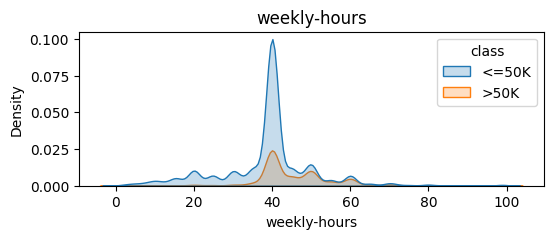

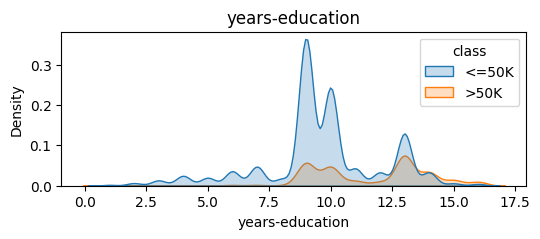

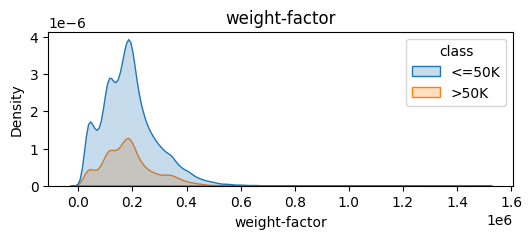

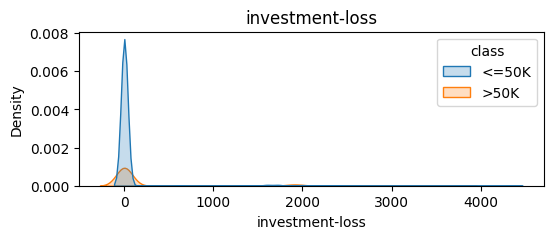

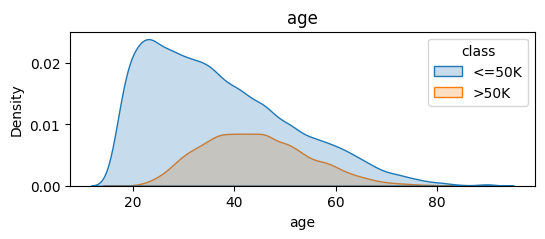

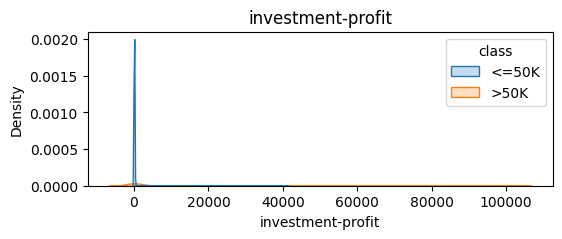

In [41]:
num_cols = df.select_dtypes(include=['int64','float64']).columns
for col in num_cols:
    plt.figure(figsize=(6,2))
    sns.kdeplot(data=df, x=col, hue='class', fill=True)
    plt.title(f"{col}")
    plt.show()

We can see that: 
- Education (years-education): high-income earners are mostly concentrated in the 12, 14, and 16 years nodes, with the highest discrimination
- Age: high-income people are concentrated in the 35-50 years old, and low-income people are younger
- Weekly-hours: >50K group has a higher density in the 40-60h interval
- Investment-loss/-profit: most of them are 0, with little information

From this we can get the following inspiration:
- The strongest prediction signal: years-education and age have the largest distribution difference, which is directly related to income.
- The second strongest signal: weekly-hours can reflect overtime and has a positive correlation with the high-income group.

Therefore, in the subsequent search space, we can focus on tuning:
- The model's treatment of years-education and age (such as polynomial degree, binning boundaries);
- The combination of overtime (weekly-hours) and regularization strength.

#### **2.3.2 Correlation between numerical features**

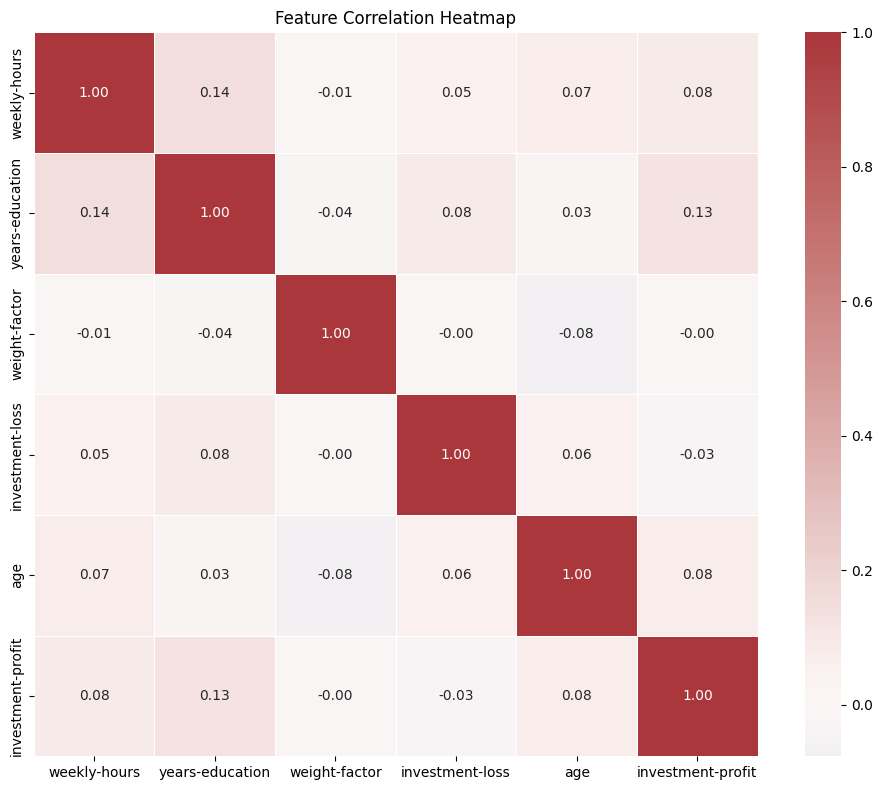

In [42]:
num_cols = df.select_dtypes(include=['int64','float64']).columns
corr = df[num_cols].corr()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    annot=True,          
    fmt=".2f",           
    cmap="vlag",         
    center=0,            
    square=True,         
    linewidths=.5        
)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()


Accroding to the Feature Correlation Heatmap, there is no obvious correlation or redundancy between the continuous features of the data, which means that we only need to focus on how to make a more appropriate transformation or modeling for each variable without worrying about them "fighting" with each other.

#### **2.4 Feature Importance**
We employ a lightweight **RandomForestClassifier** to rank feature importances and drop low-value predictors. 

C:\Users\yezel\AppData\Local\Temp\ipykernel_42760\2858950067.py:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  importances[top_indices][::-1],


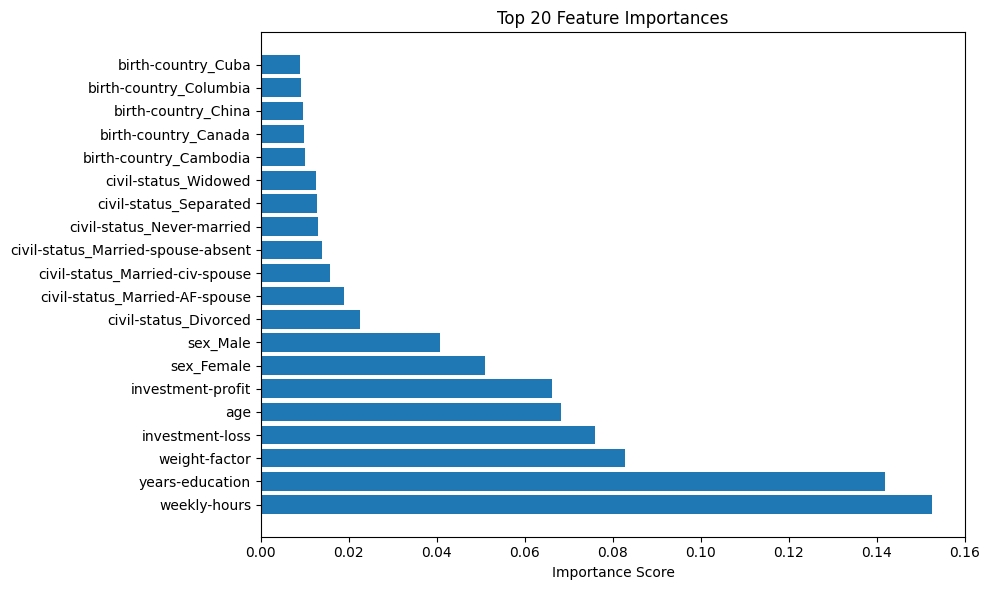

In [43]:
# --- Random Forest for Feature Selection ------------------------------------
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

X = pd.get_dummies(df.drop(columns="class"), drop_first=False)
y = df["class"]

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

rf_sel = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    n_jobs=-1,
    random_state=42,
    class_weight="balanced"
)
rf_sel.fit(X_train, y_train)

importances = pd.Series(rf_sel.feature_importances_, index=X.columns).sort_values(ascending=False)
columns = X.columns

indices = np.argsort(importances)[::-1]

top_k = 20
top_indices = indices[:top_k]

plt.figure(figsize=(10, 6))
plt.title("Top {} Feature Importances".format(top_k))
plt.barh(
    np.arange(top_k)[::-1],
    importances[top_indices][::-1],
    align="center"
)
plt.yticks(
    np.arange(top_k)[::-1],
    [columns[i] for i in top_indices][::-1]
)
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

From the above figure, we can draw the following conclusions:
- Weight-factor, investment-loss and investment-profit are not noticeable in the linear heat map, but they rank high in RF, indicating that there are segmentation patterns that are difficult to capture in linearity.
- Gender, marriage, and nationality jointly explain cultural and socioeconomic factors.
- If the long tails of weight-factor and investment-profit/loss are not transformed, the model can still be identified, but the explanatory power and robustness are reduced.

## **3 Key Takeaways and Future Directions:**

#### **3.1 Core Drivers**
- Weekly hours, years of education, and age are the most explanatory continuous features.
- Investment behavior (profit/loss) provides additional discriminative signal for high-income individuals.
- Social attributes (marital status, gender, country of origin), while not actionable, significantly influence income distribution and require fairness considerations.

#### **3.2 Data Processing Guidelines**
- Apply log transformations or binning to highly skewed features (weight-factor, investment-profit, investment-loss) to enhance model stability and robustness.

#### **3.3  Practical Insights**
- Increasing work hours and education level are the most direct levers for boosting income.
- Investment activities can amplify income disparities but carry higher risk.
- Social attributes affect income distribution; models should incorporate fairness checks and bias monitoring.